In [18]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

T = 1
number_of_trials = 100


def xi():
    return random.randrange(-1, 2, 2)


def b(V):
    x = V[0]
    y = V[1]
    z = V[2]
    rslt_x = 10 * (y - x)
    rslt_y = x * (28 - z) - y
    rslt_z = x * y - 8 * z / 3
    return np.array([rslt_x, rslt_y, rslt_z])


def euler_maruyama_scheme(G, h, hsqrt, sigma):
    return G + h * b(G) + hsqrt * sigma * xi()


def approximate(h, calculation_scheme):
    number_of_steps = math.floor(T / h)
    hsqrt = np.sqrt(h)
    sigma = np.array([1, 1, 1])
    x_tick = max(0.01, h)
    x_ticks = np.arange(0, 1 + x_tick / 2, x_tick)
    x_data = []
    y_data = []
    z_data = []
    for _ in x_ticks:
        x_data.append([])
        y_data.append([])
        z_data.append([])

    for _ in range(number_of_trials):
        # initial values of x, y, z
        G = np.array([-5.91652, -5.52332, 24.57231])

        current_tick = 0
        x_data[0].append(G[0])
        y_data[0].append(G[1])
        z_data[0].append(G[2])
        for k in range(number_of_steps):
            G = calculation_scheme(G, h, hsqrt, sigma)
            if k * h >= x_ticks[current_tick]:
                current_tick += 1
                x_data[current_tick].append(G[0])
                y_data[current_tick].append(G[1])
                z_data[current_tick].append(G[2])

    return x_ticks, x_data, y_data, z_data


def approximate_and_plot(h, calculation_scheme, scheme_name):
    x_ticks, x_data, y_data, z_data = approximate(h, calculation_scheme)
    X = []
    Y = []
    Z = []
    for idx, tick in enumerate(x_ticks):
        X.append(np.average(x_data[idx]))
        Y.append(np.average(y_data[idx]))
        Z.append(np.average(z_data[idx]))

    plt.plot(x_ticks, X, label='X')
    plt.plot(x_ticks, Y, label='Y')
    plt.plot(x_ticks, Z, label='Z')
    plt.title(f'Approximations using {scheme_name}, h = {h}')
    plt.legend()
    plt.show()


In [ ]:
# Lets run approximations using Euler-Maruyama scheme for different h

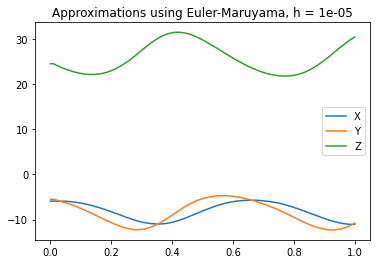

In [20]:
approximate_and_plot(0.00001, euler_maruyama_scheme, 'Euler-Maruyama')

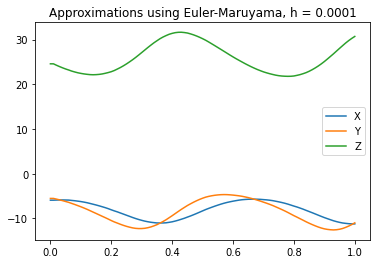

In [21]:
approximate_and_plot(0.0001, euler_maruyama_scheme, 'Euler-Maruyama')

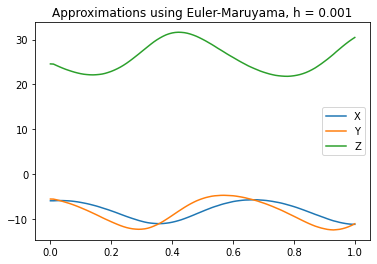

In [22]:
approximate_and_plot(0.001, euler_maruyama_scheme, 'Euler-Maruyama')

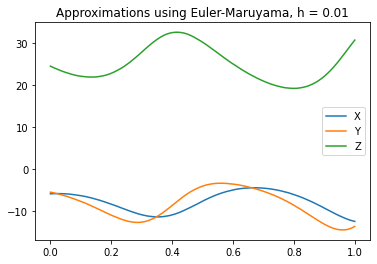

In [23]:
approximate_and_plot(0.01, euler_maruyama_scheme, 'Euler-Maruyama')

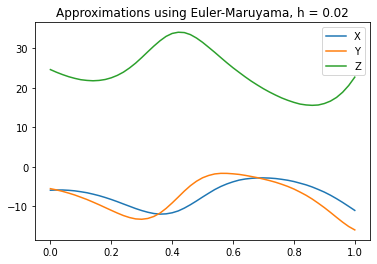

In [24]:
approximate_and_plot(0.02, euler_maruyama_scheme, 'Euler-Maruyama')

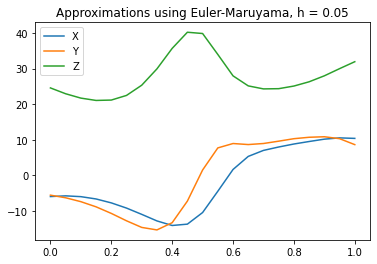

In [25]:
approximate_and_plot(0.05, euler_maruyama_scheme, 'Euler-Maruyama')

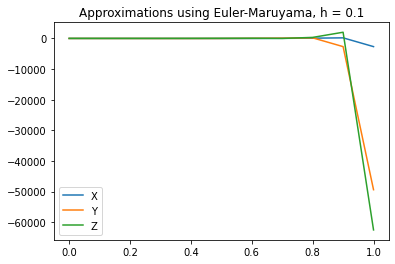

In [27]:
approximate_and_plot(0.1, euler_maruyama_scheme, 'Euler-Maruyama')

In [28]:
# For small value of h h=0.00001 the calculation took a lot of time. Approximations with h=0.0001 and h=0.001 run much
# faster and both gave the result very similar to the h=0.00001  Starting with h=0.01, the approximations started losing
# precision, and for h=0.1 the process diverged

In [29]:
# Now, lets estimate the error. We assume the error to have an expression err(h) = c * h^p (we ignore higher powers of h).
# Then log(err(h)) = log(c) + p*log(h)
# For the exact value estimate, we will take the calculation with small h, and calculate the 
# strong and weak conversion error for x(t) at time horizon correspnding to the interval end

In [78]:
def plot_error_by_h(calculation_scheme, scheme_name):
    x_ticks_exact, x_data_exact, y_data_exact, z_data_exact = approximate(0.0001, calculation_scheme)
    exact_val_estimate = np.average(x_data_exact[-1])
    h_vals = np.arange(0.002, 0.009, 0.0001)
    x_axis_vals = []
    error_x_weak = []
    error_x_strong = []
    for h in h_vals:
        x_axis_vals.append(math.log(h))
        x_ticks, x_data, y_data, z_data = approximate(h, calculation_scheme)
        for data in reversed(x_data):
            if len(data) > 0:
                data_for_strong_convergence = abs(np.array(data) - exact_val_estimate)
                error_x_strong.append(math.log(np.average(data_for_strong_convergence)))
                data_for_weak_convergence = abs(np.average(data) - exact_val_estimate)
                error_x_weak.append(math.log(np.average(data_for_weak_convergence)))
                break
    plt.plot(x_axis_vals, error_x_strong, 'o')
    m, b = np.polyfit(x_axis_vals, error_x_strong, 1)
    plt.plot(x_axis_vals, m*np.array(x_axis_vals)+b)
    plt.title(f'{scheme_name} Strong Convergence p={m}')
    plt.show()
    plt.plot(x_axis_vals, error_x_weak, 'o')
    m1, b1 = np.polyfit(x_axis_vals, error_x_weak, 1)
    plt.plot(x_axis_vals, m1*np.array(x_axis_vals)+b1)
    plt.title(f'{scheme_name} Weak Convergence p={m1}')
    plt.show()


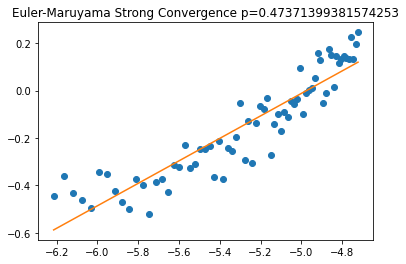

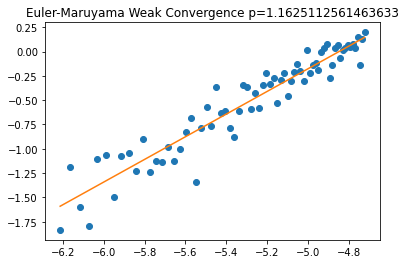

In [79]:
plot_error_by_h(euler_maruyama_scheme, 'Euler-Maruyama')